In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
x=df[["Price","Mileage","Cylinder"]]

In [5]:
x.head()#3 columnlu yani 3 özelliği olan bir dataframe yaptık

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [6]:
model=KMeans(n_clusters=4)#4 tane sınıfa ayırcağınızı söylüyorsunuz

In [7]:
model=KMeans(n_clusters=4)#4 tane sınıfa ayırcağınızı söylüyorsunuz
model=model.fit(x)
pred=model.predict(x)

In [8]:
pred=model.predict(x)

In [9]:
pred#sınıflandırdık ve bunlarda sınıflarımız

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [10]:
x["cluster"]=pred#tahminlerimizi Datamız koyuyoruz

C:\Users\ahmet\AppData\Local\Temp/ipykernel_7160/3214141912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=pred#tahminlerimizi Datamız koyuyoruz


In [11]:
x.head()#verimizde de artik sınıflandırmayı görebiliyoruz

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [12]:
silhouette_score(x,pred)#başarı oranımız

0.41328610364684915

In [13]:
#Acaba kaç gruba ayırsam dah doğru sonuçalırım
def clust(clusters):
    for no_of_cluster in np.arrange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))

In [14]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")#clsutering yaparkenki noktaların merkezini gösteriyor
model.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

No handles with labels found to put in legend.


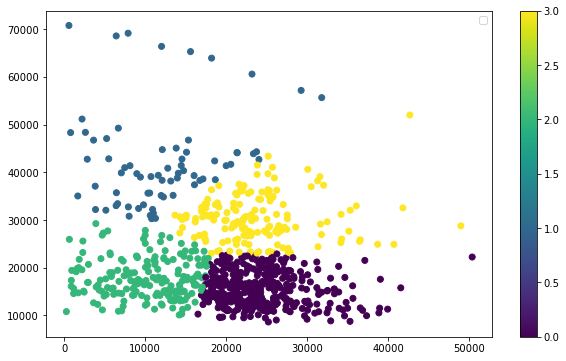

In [15]:
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [21]:
#Acaba doğru mu yaptım acaba kaç sınıfa ayırmam lazım dedim
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(x)
        score=silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)#10 sınfa kadar deniyorum acaba hangisi daha iyi

Number of cluster 2,silhouette0.45170118960594147
Number of cluster 3,silhouette0.41321086771955506
Number of cluster 4,silhouette0.41145279736582613
Number of cluster 5,silhouette0.35365266278273383
Number of cluster 6,silhouette0.37220230173113944
Number of cluster 7,silhouette0.3573440965265044
Number of cluster 8,silhouette0.3682175091347431
Number of cluster 9,silhouette0.3456859662733015
Number of cluster 10,silhouette0.35204123724223146


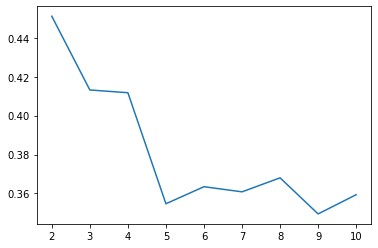

In [17]:
plt.plot(allclusters,allscore)

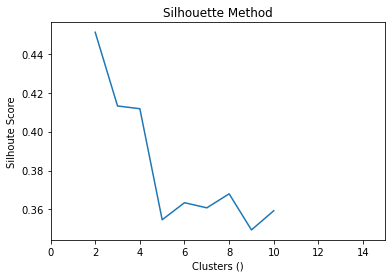

In [18]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters ()")
plt.ylabel("Silhoute Score")
plt.title("Silhouette Method")
plt.xlim(0,15)
plt.show()

In [19]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.45170118960594147
Number of cluster 3,silhouette0.41321086771955506
Number of cluster 4,silhouette0.41406285638580825
Number of cluster 5,silhouette0.3552183385376971
Number of cluster 6,silhouette0.3617020938994266
Number of cluster 7,silhouette0.358438640453935
Number of cluster 8,silhouette0.36108433287051794
Number of cluster 9,silhouette0.3651761460828939


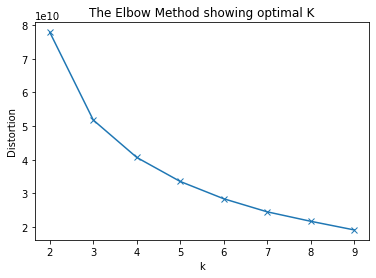

In [20]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()#dirsek metodunda nerden kırılıyorsa o sayıda sınıfa bölmek en iyisi olur diyoruz bu örnek için 4 mesela 